In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import traceback
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

# Create a list for holding the cities.
cities = []
city_data = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=604c60a695213c78478f704076a569c2


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=604c60a695213c78478f704076a569c2&q=Boston


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | punta arenas
Processing Record 2 of Set 13 | matara
Processing Record 3 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 13 | nicoya
Processing Record 5 of Set 13 | turayf
Processing Record 6 of Set 13 | nishihara
Processing Record 7 of Set 13 | gizo
Processing Record 8 of Set 13 | kawalu
Processing Record 9 of Set 13 | bredasdorp
Processing Record 10 of Set 13 | rjukan
Processing Record 11 of Set 13 | sayat
Processing Record 12 of Set 13 | karratha
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | port alfred
Processing Record 15 of Set 13 | yagodnoye
Processing Record 16 of Set 13 | ushuaia
Processing Record 17 of Set 13 | port elizabeth
Processing Record 18 of Set 13 | nanortalik
Processing Record 19 of Set 13 | tuatapere
Processing Record 20 of Set 13 | hualmay
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | jame

City not found. Skipping...
Processing Record 34 of Set 16 | svetlogorsk
Processing Record 35 of Set 16 | tutoia
Processing Record 36 of Set 16 | abu dhabi
Processing Record 37 of Set 16 | tiksi
Processing Record 38 of Set 16 | nagato
Processing Record 39 of Set 16 | aklavik
Processing Record 40 of Set 16 | roald
Processing Record 41 of Set 16 | veshkayma
Processing Record 42 of Set 16 | sao filipe
Processing Record 43 of Set 16 | anupgarh
Processing Record 44 of Set 16 | jilotepec
Processing Record 45 of Set 16 | comodoro rivadavia
Processing Record 46 of Set 16 | vila franca do campo
Processing Record 47 of Set 16 | esperance
Processing Record 48 of Set 16 | moree
Processing Record 49 of Set 16 | ust-kut
Processing Record 50 of Set 16 | grand-santi
Processing Record 1 of Set 17 | itarema
Processing Record 2 of Set 17 | tigil
Processing Record 3 of Set 17 | souillac
Processing Record 4 of Set 17 | marcona
City not found. Skipping...
Processing Record 5 of Set 17 | karamea
City not fou

Processing Record 16 of Set 20 | odweyne
Processing Record 17 of Set 20 | seydi
Processing Record 18 of Set 20 | middle island
Processing Record 19 of Set 20 | kizema
Processing Record 20 of Set 20 | codrington
Processing Record 21 of Set 20 | campechuela
Processing Record 22 of Set 20 | luoyang
Processing Record 23 of Set 20 | la rioja
Processing Record 24 of Set 20 | bouar
Processing Record 25 of Set 20 | ossora
Processing Record 26 of Set 20 | vievis
Processing Record 27 of Set 20 | nyrob
Processing Record 28 of Set 20 | kichera
Processing Record 29 of Set 20 | muisne
Processing Record 30 of Set 20 | lorengau
Processing Record 31 of Set 20 | salalah
Processing Record 32 of Set 20 | margate
Processing Record 33 of Set 20 | vestmannaeyjar
Processing Record 34 of Set 20 | aksarka
Processing Record 35 of Set 20 | shimoda
Processing Record 36 of Set 20 | udachnyy
Processing Record 37 of Set 20 | caucaia
Processing Record 38 of Set 20 | dzaoudzi
Processing Record 39 of Set 20 | panaba
Pro

Processing Record 9 of Set 24 | puerto penasco
Processing Record 10 of Set 24 | olafsvik
Processing Record 11 of Set 24 | kasempa
Processing Record 12 of Set 24 | walvis bay
Processing Record 13 of Set 24 | korem
Processing Record 14 of Set 24 | shenjiamen
Processing Record 15 of Set 24 | kamina
Processing Record 16 of Set 24 | luderitz
Processing Record 17 of Set 24 | klodzko
Processing Record 18 of Set 24 | maneadero
Processing Record 19 of Set 24 | pevek
Processing Record 20 of Set 24 | krasnousolskiy
City not found. Skipping...
Processing Record 21 of Set 24 | santo andre
Processing Record 22 of Set 24 | hami
Processing Record 23 of Set 24 | fare
Processing Record 24 of Set 24 | lamu
Processing Record 25 of Set 24 | victor harbor
Processing Record 26 of Set 24 | wellington
Processing Record 27 of Set 24 | bay roberts
Processing Record 28 of Set 24 | palimbang
Processing Record 29 of Set 24 | bahia blanca
Processing Record 30 of Set 24 | formoso do araguaia
City not found. Skipping.

In [8]:
len_city_data = len(city_data)
print(len_city_data)

576


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,42.01,65,40,14.99,CL,2020-04-20 02:12:35
1,Matara,5.95,80.54,84.72,73,1,8.21,LK,2020-04-20 02:16:24
2,Nicoya,10.15,-85.45,73.00,85,4,10.00,CR,2020-04-20 02:16:25
3,Turayf,31.67,38.66,57.20,54,0,6.93,SA,2020-04-20 02:16:25
4,Nishihara,26.18,127.76,66.20,93,90,6.93,JP,2020-04-20 02:16:25
5,Gizo,-8.10,156.84,84.02,72,83,2.73,SB,2020-04-20 02:16:25
6,Kawalu,-7.38,108.21,87.30,55,39,2.93,ID,2020-04-20 02:16:26
7,Bredasdorp,-34.53,20.04,59.00,93,0,8.05,ZA,2020-04-20 02:12:57
8,Rjukan,59.88,8.59,37.00,71,1,5.99,NO,2020-04-20 02:16:26
9,Sayat,38.78,63.88,72.46,25,0,3.69,TM,2020-04-20 02:16:26


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-04-20 02:12:35,-53.15,-70.92,42.01,65,40,14.99
1,Matara,LK,2020-04-20 02:16:24,5.95,80.54,84.72,73,1,8.21
2,Nicoya,CR,2020-04-20 02:16:25,10.15,-85.45,73.00,85,4,10.00
3,Turayf,SA,2020-04-20 02:16:25,31.67,38.66,57.20,54,0,6.93
4,Nishihara,JP,2020-04-20 02:16:25,26.18,127.76,66.20,93,90,6.93
5,Gizo,SB,2020-04-20 02:16:25,-8.10,156.84,84.02,72,83,2.73
6,Kawalu,ID,2020-04-20 02:16:26,-7.38,108.21,87.30,55,39,2.93
7,Bredasdorp,ZA,2020-04-20 02:12:57,-34.53,20.04,59.00,93,0,8.05
8,Rjukan,NO,2020-04-20 02:16:26,59.88,8.59,37.00,71,1,5.99
9,Sayat,TM,2020-04-20 02:16:26,38.78,63.88,72.46,25,0,3.69


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/19/20'

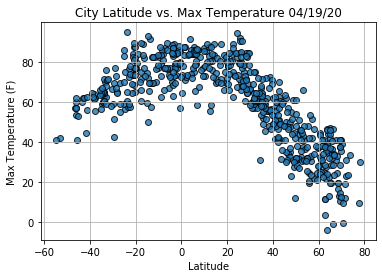

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

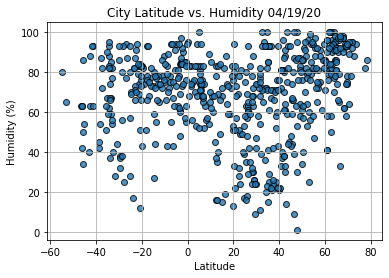

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

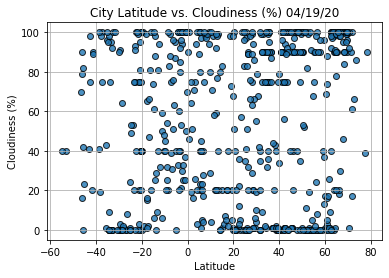

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

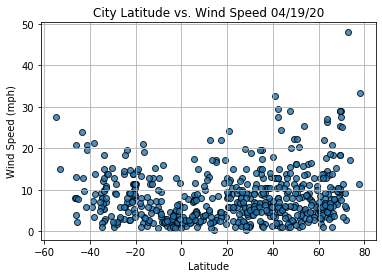

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

p_value

9.905329910807858e-71

In [24]:
# Print data from Latitudes and Max Temps Plot

print(slope, intercept, r_value, p_value, std_err)

-0.407333872061268 68.13066084675219 -0.6509863033988367 9.905329910807858e-71 0.019825114244245323


In [26]:
# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats * slope + intercept

regress_values

0      89.780456
1      65.707024
2      63.996222
3      55.230397
4      57.466660
         ...    
571    82.228486
572    66.187678
573    80.631737
574    50.350537
575    48.464582
Name: Lat, Length: 576, dtype: float64

In [27]:
# Get the equation of the line.
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -0.41x + 68.13'

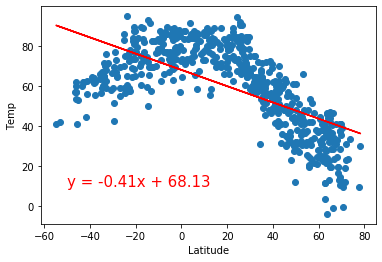

In [29]:
# Plot the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_equation, (-50,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')

plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # Added a title - it was missing in the module thus no title was displayed in the scatterplot when the function was called
    # Used suptitle instead of title due to an error "'str' is not callable"
    plt.suptitle(title)      
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                    Yagodnoye
Country                        RU
Date          2020-04-20 02:16:27
Lat                         62.55
Lng                        149.67
Max Temp                    11.28
Humidity                       81
Cloudiness                    100
Wind Speed                   6.42
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-04-20 02:12:35,-53.15,-70.92,42.01,65,40,14.99
5,Gizo,SB,2020-04-20 02:16:25,-8.10,156.84,84.02,72,83,2.73
6,Kawalu,ID,2020-04-20 02:16:26,-7.38,108.21,87.30,55,39,2.93
7,Bredasdorp,ZA,2020-04-20 02:12:57,-34.53,20.04,59.00,93,0,8.05
10,Karratha,AU,2020-04-20 02:16:27,-20.74,116.85,87.69,51,95,9.84
12,Port Alfred,ZA,2020-04-20 02:14:08,-33.59,26.89,70.00,67,0,3.00
14,Ushuaia,AR,2020-04-20 02:16:28,-54.80,-68.30,41.00,80,40,27.51
15,Port Elizabeth,ZA,2020-04-20 02:16:28,-33.92,25.57,71.60,37,0,14.99
17,Tuatapere,NZ,2020-04-20 02:16:28,-46.13,167.68,57.00,63,16,8.01
18,Hualmay,PE,2020-04-20 02:16:28,-11.10,-77.61,70.05,78,6,7.16


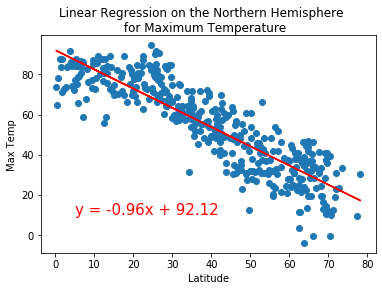

In [34]:
# Perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(5,10))

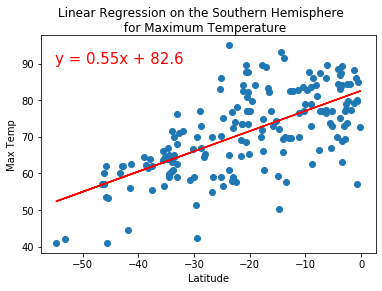

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

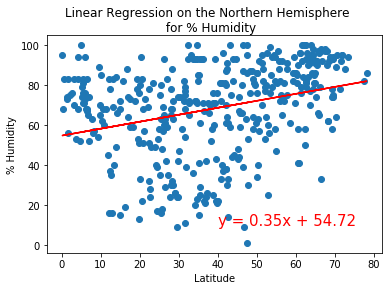

In [36]:
# Perform linear regression on latitude and maximum humidity from each hemisphere DataFrame.


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

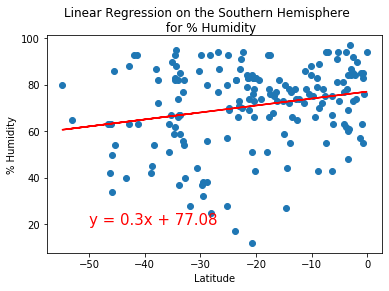

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

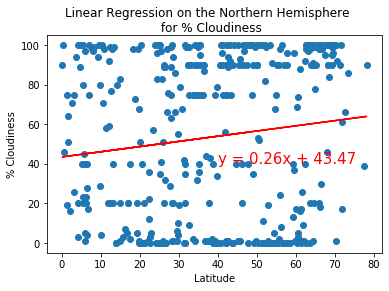

In [38]:
# Perform linear regression on latitude and cloudiness from each hemisphere DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

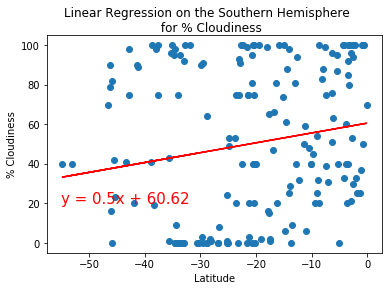

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,20))

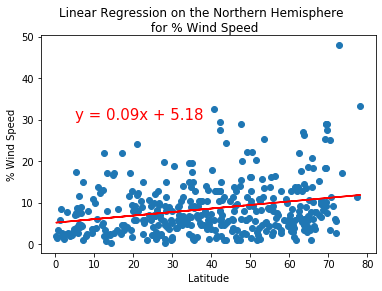

In [40]:
# Perform linear regression on latitude and wind speed from each hemisphere DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Wind Speed', '% Wind Speed',(5,30))

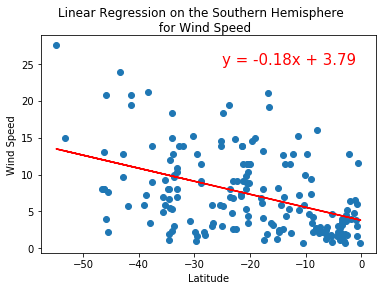

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))